In [4]:
!ls /kaggle/input/sistema-de-informaes-hospitalares-sus

RD202401.csv  RD202404.csv  RD202407.csv  RD202410.csv
RD202402.csv  RD202405.csv  RD202408.csv  RD202411.csv
RD202403.csv  RD202406.csv  RD202409.csv  RD202412.csv


# Etapa 1: Coleta de dados

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Configura a biblioteca pandas para exibir todos os itens da sequência do base de dados
pd.options.display.max_seq_items = 113

# Carrega a base de dados
df = pd.read_csv('/kaggle/input/sistema-de-informaes-hospitalares-sus/RD202401.csv', sep=';', low_memory=False)
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,120000,2024,1,3,4.034526e+12,1224100031374,1,69911814,120040,19560415,...,NaN,0,0,0,0,0,0,0,0,0
1,120000,2024,1,3,4.034526e+12,1224100031539,1,69900970,120040,19520515,...,NaN,0,0,0,0,0,0,0,0,0
2,120000,2024,1,3,4.034526e+12,1224100031550,1,69934000,120025,19980315,...,NaN,0,0,0,0,0,0,0,0,0
3,120000,2024,1,3,4.034526e+12,1224100031650,1,69900100,120040,19460726,...,NaN,0,0,0,0,0,0,0,0,0
4,120000,2024,1,3,4.034526e+12,1224100031814,1,69900970,120040,20200313,...,NaN,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107872,172120,2024,1,2,NaN,1724100104430,1,77900000,172120,20011130,...,NaN,0,0,0,0,0,0,0,0,0
1107873,172120,2024,1,2,NaN,1724100104441,1,77900000,172120,19950319,...,NaN,0,0,0,0,0,0,0,0,0
1107874,172120,2024,1,2,NaN,1724100104452,1,77958000,172010,20010904,...,NaN,0,0,0,0,0,0,0,0,0
1107875,172120,2024,1,2,NaN,1724100104463,1,77950000,170220,19930609,...,NaN,0,0,0,0,0,0,0,0,0


# Etapa 2: Limpeza dos dados

In [6]:
# Mostra as colunas em sequência da base de dados
df.columns

Index(['UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'ESPEC', 'CGC_HOSP', 'N_AIH', 'IDENT',
       'CEP', 'MUNIC_RES', 'NASC', 'SEXO', 'UTI_MES_IN', 'UTI_MES_AN',
       'UTI_MES_AL', 'UTI_MES_TO', 'MARCA_UTI', 'UTI_INT_IN', 'UTI_INT_AN',
       'UTI_INT_AL', 'UTI_INT_TO', 'DIAR_ACOM', 'QT_DIARIAS', 'PROC_SOLIC',
       'PROC_REA', 'VAL_SH', 'VAL_SP', 'VAL_SADT', 'VAL_RN', 'VAL_ACOMP',
       'VAL_ORTP', 'VAL_SANGUE', 'VAL_SADTSR', 'VAL_TRANSP', 'VAL_OBSANG',
       'VAL_PED1AC', 'VAL_TOT', 'VAL_UTI', 'US_TOT', 'DT_INTER', 'DT_SAIDA',
       'DIAG_PRINC', 'DIAG_SECUN', 'COBRANCA', 'NATUREZA', 'NAT_JUR', 'GESTAO',
       'RUBRICA', 'IND_VDRL', 'MUNIC_MOV', 'COD_IDADE', 'IDADE', 'DIAS_PERM',
       'MORTE', 'NACIONAL', 'NUM_PROC', 'CAR_INT', 'TOT_PT_SP', 'CPF_AUT',
       'HOMONIMO', 'NUM_FILHOS', 'INSTRU', 'CID_NOTIF', 'CONTRACEP1',
       'CONTRACEP2', 'GESTRISCO', 'INSC_PN', 'SEQ_AIH5', 'CBOR', 'CNAER',
       'VINCPREV', 'GESTOR_COD', 'GESTOR_TP', 'GESTOR_CPF', 'GESTOR_DT',
       'CNES', 'CNPJ_M

In [7]:
# Delimitar as colunas de interesse em recorte da base de dados
df = df[[
    'UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'ESPEC', 'N_AIH', 'IDENT', 'CEP', 'MUNIC_RES', 'NASC', 'SEXO',
    'UTI_MES_TO', 'MARCA_UTI', 'UTI_INT_TO', 'DIAR_ACOM', 'QT_DIARIAS', 'PROC_SOLIC',
    'PROC_REA', 'VAL_SH', 'VAL_SP', 'VAL_TOT', 'VAL_UTI', 'US_TOT', 'DT_INTER', 'DT_SAIDA',
    'DIAG_PRINC', 'DIAG_SECUN', 'COBRANCA', 'NATUREZA', 'NAT_JUR', 'GESTAO',
    'IND_VDRL', 'MUNIC_MOV', 'COD_IDADE', 'IDADE', 'DIAS_PERM', 'MORTE', 'NACIONAL',
    'CAR_INT', 'HOMONIMO', 'NUM_FILHOS', 'INSTRU', 'CID_NOTIF', 'CONTRACEP1',
    'CONTRACEP2', 'GESTRISCO', 'INSC_PN', 'SEQ_AIH5', 'CBOR', 'CNAER',
    'VINCPREV', 'GESTOR_COD', 'GESTOR_TP', 'GESTOR_DT', 'CNES', 'INFEHOSP', 
    'CID_ASSO', 'CID_MORTE', 'COMPLEX', 'FINANC', 'FAEC_TP', 'REGCT', 'RACA_COR', 'ETNIA',
    'VAL_SH_FED', 'VAL_SP_FED', 'VAL_SH_GES', 'VAL_SP_GES', 'VAL_UCI', 'MARCA_UCI'
]].copy()

In [8]:
# Gera um resumo das informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107877 entries, 0 to 1107876
Data columns (total 69 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   UF_ZI       1107877 non-null  int64  
 1   ANO_CMPT    1107877 non-null  int64  
 2   MES_CMPT    1107877 non-null  int64  
 3   ESPEC       1107877 non-null  int64  
 4   N_AIH       1107877 non-null  int64  
 5   IDENT       1107877 non-null  int64  
 6   CEP         1107877 non-null  int64  
 7   MUNIC_RES   1107877 non-null  int64  
 8   NASC        1107877 non-null  int64  
 9   SEXO        1107877 non-null  int64  
 10  UTI_MES_TO  1107877 non-null  int64  
 11  MARCA_UTI   1107877 non-null  int64  
 12  UTI_INT_TO  1107877 non-null  int64  
 13  DIAR_ACOM   1107877 non-null  int64  
 14  QT_DIARIAS  1107877 non-null  int64  
 15  PROC_SOLIC  1107877 non-null  int64  
 16  PROC_REA    1107877 non-null  int64  
 17  VAL_SH      1107877 non-null  float64
 18  VAL_SP      1107877 no

In [9]:
# Transformar variável categórica
df['DIAG_PRINC'] = df['DIAG_PRINC'].astype(str)
df['CID_NOTIF'] = df['CID_NOTIF'].astype(str)

In [10]:
df['UF_ZI'] = df['UF_ZI'].astype(str)

In [11]:
# Verifica se há variáveis com valores nulos
df.isnull().sum()

UF_ZI         0
ANO_CMPT      0
MES_CMPT      0
ESPEC         0
N_AIH         0
             ..
VAL_SP_FED    0
VAL_SH_GES    0
VAL_SP_GES    0
VAL_UCI       0
MARCA_UCI     0
Length: 69, dtype: int64

In [12]:
#Substitui entradas, conforme planilha de legenda, que representam valores duplicados - coluna SEXO
df.loc[df['SEXO'] == 3, 'SEXO'] = 2

In [13]:
# Pré-processamento
# Filtrar para a Bahia (código 29)
df['UF_ZI'] = df['UF_ZI'].astype(str)
df_bahia = df[df['UF_ZI'].str.startswith('29')].copy()

In [14]:
# Converter data de internação para datetime (formato 'aaaammdd')
df_bahia['DT_INTER'] = pd.to_datetime(df_bahia['DT_INTER'], format='%Y%m%d', errors='coerce')
df_bahia['DT_SAIDA'] = pd.to_datetime(df_bahia['DT_SAIDA'], format='%Y%m%d', errors='coerce')
df_bahia = df_bahia.dropna(subset=['DT_INTER']) # Remover datas inválidas se houver
df_bahia = df_bahia.dropna(subset=['DT_SAIDA']) 

In [15]:
# Importando os dados de municípios
df_municipios = pd.read_csv('/kaggle/input/municipios/municipios.csv')
df_municipios

,Id,Codigo,Nome,Uf
0,1,1100015,Alta Floresta D'Oeste,RO
1,2,1100023,Ariquemes,RO
2,3,1100031,Cabixi,RO
3,4,1100049,Cacoal,RO
4,5,1100056,Cerejeiras,RO
...,...,...,...,...
5565,5566,5222005,Vianópolis,GO
5566,5567,5222054,Vicentinópolis,GO
5567,5568,5222203,Vila Boa,GO
5568,5569,5222302,Vila Propício,GO


In [16]:
# Convertendo o código do município para string e pegando apenas os 6 primeiros caracteres
# e filtrando para o estado da Bahia
df_municipios['Codigo'] = df_municipios['Codigo'].astype(str).str[:6]
df_municipios = df_municipios[df_municipios['Codigo'].str.startswith('29')]
df_municipios

,Id,Codigo,Nome,Uf
1827,1828,290010,Abaíra,BA
1828,1829,290020,Abaré,BA
1829,1830,290030,Acajutiba,BA
1830,1831,290035,Adustina,BA
1831,1832,290040,Água Fria,BA
...,...,...,...,...
2239,2240,293330,Vitória da Conquista,BA
2240,2241,293340,Wagner,BA
2241,2242,293345,Wanderley,BA
2242,2243,293350,Wenceslau Guimarães,BA


# Etapa 3: Interpretação e comunicação dos resultados
## Pergunta 1: Quais cidades tem o maior numero de internações?

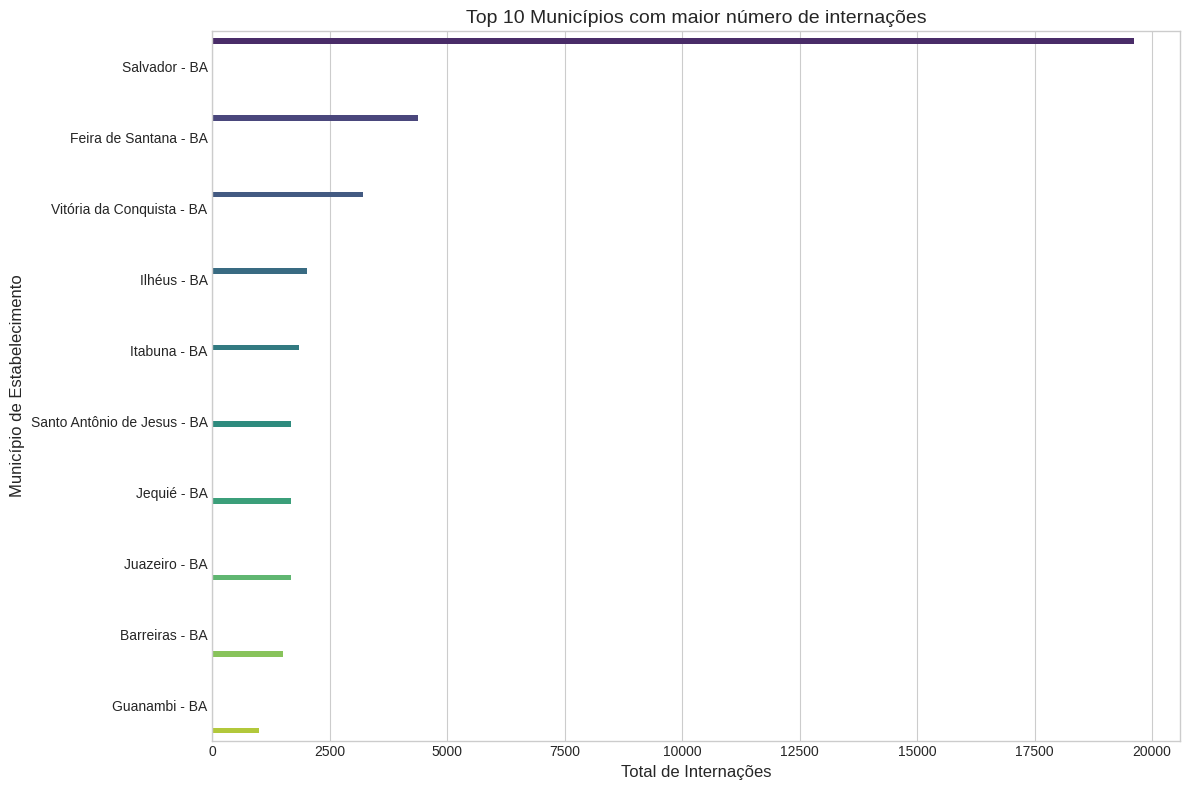

In [17]:
# Contagem das 10 cidades com mais internações
contagem_internacoes = df_bahia['MUNIC_MOV'].value_counts().nlargest(10).reset_index()
contagem_internacoes['MUNIC_MOV'] = contagem_internacoes['MUNIC_MOV'].astype(str)
contagem_internacoes.columns = ['MUNIC_MOV', 'INTER']

# Merge com o dataframe de municípios
top_municipios = pd.merge(
    contagem_internacoes,
    df_municipios,
    left_on='MUNIC_MOV',
    right_on='Codigo'
)

# Criando coluna com nome formatado
top_municipios['Municipios'] = top_municipios['Nome'] + ' - ' + top_municipios['Uf']

# Gráfico
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(
    data=top_municipios,
    x='INTER',
    y='Municipios',
    hue='Municipios',
    palette='viridis',
    ax=ax
)

ax.set_title('Top 10 Municípios com maior número de internações', fontsize=14)
ax.set_xlabel('Total de Internações', fontsize=12)
ax.set_ylabel('Município de Estabelecimento', fontsize=12)
ax.legend_.remove()
plt.tight_layout()
plt.show()


## Pergunta 2: Qual é a distribuição de internações por sexo dos pacientes na Bahia?

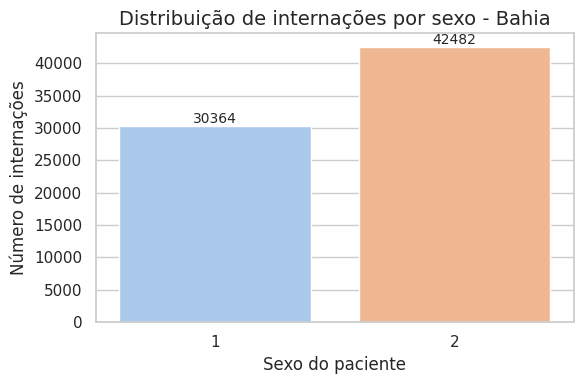

In [20]:
# Contar internações por sexo
sexo_counts = df_bahia['SEXO'].value_counts().reset_index()
sexo_counts.columns = ['SEXO', 'QTD_INTERNAÇÕES']

# Criar o gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
ax = sns.barplot(data=sexo_counts, x='SEXO', y='QTD_INTERNAÇÕES', palette='pastel')

# Melhorar rótulos
plt.title('Distribuição de internações por sexo - Bahia', fontsize=14)
plt.xlabel('Sexo do paciente', fontsize=12)
plt.ylabel('Número de internações', fontsize=12)

# Adicionar rótulos nos valores
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

## Pergunta 3: Qual é a faixa etária mais frequente entre os pacientes internados em hospitais baianos?

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


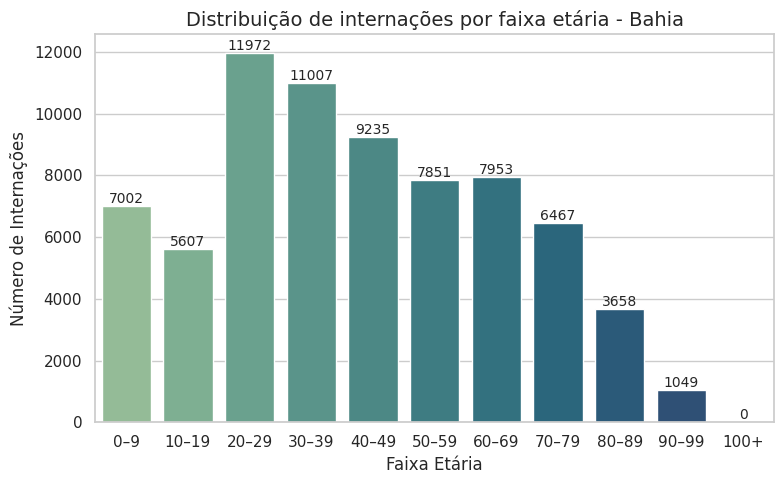

In [24]:
# Criar faixas etárias
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 120]
labels = ['0–9', '10–19', '20–29', '30–39', '40–49', '50–59', '60–69', '70–79', '80–89', '90–99', '100+']
df_bahia['faixa_etaria'] = pd.cut(df_bahia['IDADE'].astype(int), bins=bins, labels=labels, right=True)

# Contar internações por faixa etária
faixa_counts = df_bahia['faixa_etaria'].value_counts().sort_index().reset_index()
faixa_counts.columns = ['Faixa Etária', 'Internações']

# Criar gráfico de barras
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
ax = sns.barplot(data=faixa_counts, x='Faixa Etária', y='Internações', palette='crest')

# Títulos e rótulos
plt.title('Distribuição de internações por faixa etária - Bahia', fontsize=14)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Número de Internações', fontsize=12)

# Rótulos nos valores
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

## Pergunta 4: Qual é a idade média dos pacientes internados na Bahia por especialidade de leito (ESPEC)?

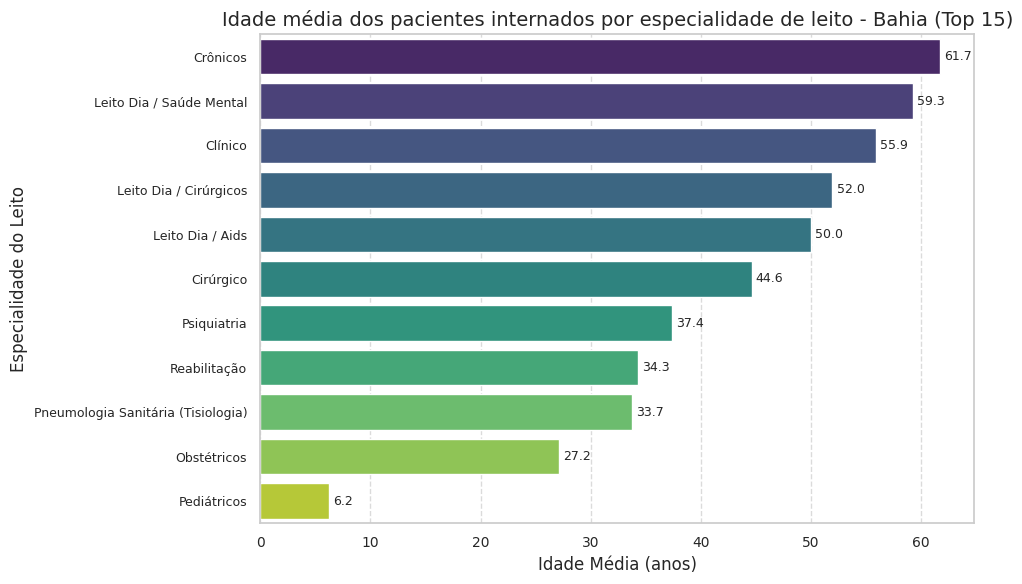

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dicionário de mapeamento para ESPEC com base na lista do usuário
# Códigos são inteiros para corresponder ao dtype int64 da coluna ESPEC
# Removendo os prefixos (ex: "01-") para um gráfico mais limpo
map_espec = {
    1: 'Cirúrgico',
    2: 'Obstétricos',
    3: 'Clínico',
    4: 'Crônicos',
    5: 'Psiquiatria',
    6: 'Pneumologia Sanitária (Tisiologia)',
    7: 'Pediátricos',
    8: 'Reabilitação',
    9: 'Leito Dia / Cirúrgicos',
    10: 'Leito Dia / Aids',
    11: 'Leito Dia / Fibrose Cística',
    12: 'Leito Dia / Intercorrência Pós-Transplante',
    13: 'Leito Dia / Geriatria',
    14: 'Leito Dia / Saúde Mental',
    51: 'UTI II Adulto COVID 19',
    52: 'UTI II Pediátrica COVID 19',
    64: 'Unidade Intermediária',
    65: 'Unidade Intermediária Neonatal',
    74: 'UTI I',
    75: 'UTI Adulto II',
    76: 'UTI Adulto III',
    77: 'UTI Infantil I',
    78: 'UTI Infantil II',
    79: 'UTI Infantil III',
    80: 'UTI Neonatal I',
    81: 'UTI Neonatal II',
    82: 'UTI Neonatal III',
    83: 'UTI Queimados',
    84: 'Acolhimento Noturno',
    85: 'UTI Coronariana-UCO tipo II',
    86: 'UTI Coronariana-UCO tipo III',
    87: 'Saúde Mental (Clínico)',
    88: 'Queimado Adulto (Clínico)',
    89: 'Queimado Pediátrico (Clínico)',
    90: 'Queimado Adulto (Cirúrgico)',
    91: 'Queimado Pediátrico (Cirúrgico)',
    92: 'UCI Neonatal Convencional',
    93: 'UCI Neonatal Canguru',
    94: 'UCI Pediátrico',
    95: 'UCI Adulto',
    96: 'Suporte Ventilatório Pulmonar COVID-19'
}

# Adicionar a coluna com as descrições
# (Assumindo que df_bahia já existe)
df_bahia['Especialidade_Desc'] = df_bahia['ESPEC'].map(map_espec)

# Calcular idade média por especialidade de leito (usando a descrição)
# Assegurar que IDADE é numérica para o .mean()
df_bahia['IDADE'] = pd.to_numeric(df_bahia['IDADE'], errors='coerce')

idade_media = (
    df_bahia.groupby('Especialidade_Desc')['IDADE']
    .mean()
    .reset_index()
    .sort_values(by='IDADE', ascending=False)
)
# Manter o .head(15) conforme o código colado
idade_media = idade_media.head(15)

# Criar gráfico de barras horizontais
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Usar 'y' para a nova coluna 'Especialidade_Desc' e 'x' para 'IDADE'
ax = sns.barplot(data=idade_media, y='Especialidade_Desc', x='IDADE', palette='viridis')

# Títulos e rótulos (corrigidos para o gráfico horizontal)
plt.title('Idade média dos pacientes internados por especialidade de leito - Bahia (Top 15)', fontsize=14)
plt.xlabel('Idade Média (anos)', fontsize=12) # Label X correta
plt.ylabel('Especialidade do Leito', fontsize=12) # Label Y correta

# Melhorar legibilidade
plt.yticks(fontsize=9)
plt.xticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Rótulos nos valores (à direita das barras)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

## Pergunta 5: Qual é o percentual de óbitos entre as internações na Bahia?

In [34]:
total_internacoes = len(df_bahia)

total_obitos = df_bahia[df_bahia['MORTE'] == 1].shape[0]

percentual_obitos = (total_obitos / total_internacoes) * 100
print(f"Total de internações na Bahia: {total_internacoes}")
print(f"Total de óbitos na Bahia: {total_obitos}")
print(f"Percentual de óbitos: {percentual_obitos:.2f}%")

Total de internações na Bahia: 72846
Total de óbitos na Bahia: 2896
Percentual de óbitos: 3.98%


## Pergunta 6: 